## Fashion Dataset Project


In this classification, the model will make predictions across three fashion categories: Glasses, Jeans, and Shoes.

In [ ]:
import tensorflow as tf
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt 

The required dataset has already been transformed from colored image with dimensions of 120 by 90 pixels into arrays, and then stored in .npz files.

In [2]:
# Loading the dataset
data_train = np.load(r"Primary categories - Train.npz")
data_val = np.load(r"Primary categories - Validation.npz")
data_test = np.load(r"Primary categories - Test.npz")

In [3]:
# Extracting the arrays from the imported data
images_train = data_train["images"]
labels_train = data_train["labels"]

images_val = data_val["images"]
labels_val = data_val["labels"]

images_test = data_test["images"]
labels_test = data_test["labels"]

In [4]:
# Checking the quantity of the data 
len_train = len(images_train)
len_val = len(images_val)
len_test = len(images_test)

print("Number of trained data is {}" .format(len_train))
print("Number of validation data is {}" .format(len_val))
print("Number of test data is {}" .format(len_test))

Number of trained data is 12963
Number of validation data is 1620
Number of test data is 1620


In [5]:
# Scaling the pixel values of all images
images_train = images_train/255.0
images_val = images_val/255.0
images_test = images_test/255.0

In [ ]:
# Creating the Model
Epochs = 15
Batch_Size = 64

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = "relu", input_shape = (120,90,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, 3,activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3)
])

In [7]:
# Define the loss function to measures how good the model is performing
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

# Defining early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "auto",
    min_delta = 0,
    patience = 2,
    verbose = 0,
    restore_best_weights = True
)

In [ ]:
# Compiling the model
model.compile(optimizer = "Adam", loss = loss_function, metrics = ["accuracy"])

In [9]:
# Training the model
model.fit(images_train, labels_train, epochs = Epochs, batch_size = Batch_Size,
callbacks = [early_stopping], validation_data = (images_val, labels_val), verbose = 2)

Epoch 1/15


203/203 - 29s - loss: 0.0865 - accuracy: 0.9729 - val_loss: 0.0051 - val_accuracy: 0.9994 - 29s/epoch - 141ms/step
Epoch 2/15
203/203 - 24s - loss: 0.0126 - accuracy: 0.9986 - val_loss: 0.0032 - val_accuracy: 0.9994 - 24s/epoch - 116ms/step
Epoch 3/15
203/203 - 23s - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9994 - 23s/epoch - 114ms/step
Epoch 4/15
203/203 - 26s - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9981 - 26s/epoch - 129ms/step


In [10]:
# Evaluating the model's performance on the validation set
validation_loss, validation_accuracy = model.evaluate(images_val,labels_val)

51/51 [==============================] - 1s 20ms/step - loss: 0.0032 - accuracy: 0.9994


In [12]:
# Predecting the test data
test_pred_raw = model.predict(images_test)
test_pred = np.argmax(test_pred_raw, axis=1)

51/51 [==============================] - 1s 18ms/step


In [13]:
# Confusion Matrix for the Test Data
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(labels_test, test_pred)
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

[Text(0, 0.5, 'Glasses/Sunglasses'),
 Text(0, 1.5, 'Trousers/Jeans'),
 Text(0, 2.5, 'Shoes')]

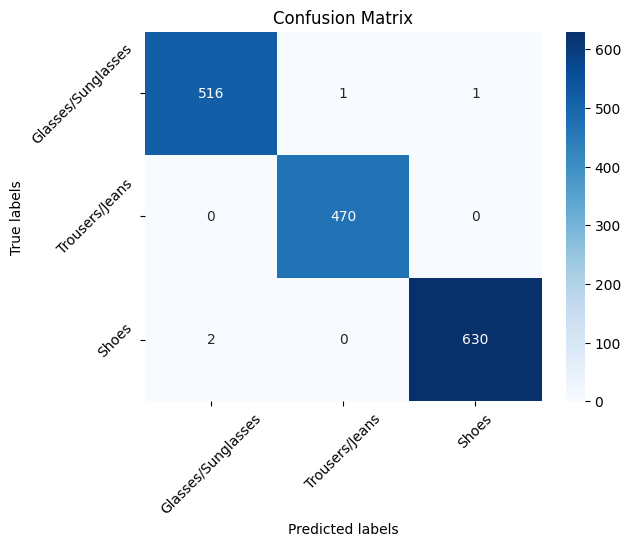

In [14]:
cm = confusion_matrix(labels_test, test_pred)
class_names=['Glasses/Sunglasses', 'Trousers/Jeans', 'Shoes']
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(class_names, rotation=45) 
ax.yaxis.set_ticklabels(class_names, rotation=45)

In [15]:
# Testing the model
test_loss, test_accuracy = model.evaluate(images_test, labels_test)

51/51 [==============================] - 1s 22ms/step - loss: 0.0205 - accuracy: 0.9975


### Conclusion

The outcome indicates that the model exhibits great performance, attaining a high degree of accuracy due to the distinct nature of the data across the three categories. Consequently, the model was able to make accurate predictions with relative ease.